In [1]:
# LIBRERIAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("practica_micro.csv")
df.head()

,MALDI_binned,Erythromycin,Ciprofloxacin
0,"[0.0002535866911222, 0.0003949856891622, 0.000...",0.0,0.0
1,"[0.0003393276603384, 0.0002025633325117, 9.727...",0.0,0.0
2,"[0.0001225308701019, 0.0001617988864636, 8.873...",1.0,0.0
3,"[0.0002821877594324, 0.0006081195988659, 0.000...",0.0,1.0
4,"[0.0003700831426878, 0.0002433899375037, 0.000...",0.0,0.0


### PREPARACIÓN DE DATOS

In [3]:
# Crear la clase para cuando no pertenezca a ninguna
# df['Sin_Resistencia'] = np.where((df['Erythromycin'] == 0) & (df['Ciprofloxacin'] == 0), 1.0, 0.0)
df['Clase'] = np.where((df['Erythromycin'] == 1) & (df['Ciprofloxacin'] == 1), 3.0,
                       np.where((df['Erythromycin'] == 1), 1,
                                np.where((df['Ciprofloxacin'] == 1), 2, 0)))
df.head()

,MALDI_binned,Erythromycin,Ciprofloxacin,Clase
0,"[0.0002535866911222, 0.0003949856891622, 0.000...",0.0,0.0,0.0
1,"[0.0003393276603384, 0.0002025633325117, 9.727...",0.0,0.0,0.0
2,"[0.0001225308701019, 0.0001617988864636, 8.873...",1.0,0.0,1.0
3,"[0.0002821877594324, 0.0006081195988659, 0.000...",0.0,1.0,2.0
4,"[0.0003700831426878, 0.0002433899375037, 0.000...",0.0,0.0,0.0


In [4]:
# Miramos la estructura del dataset un poco
datos = eval(df.iloc[0]['MALDI_binned'])
print(len(datos))
print(np.max(datos))
print(np.min(datos))

6000
0.0156976407769727
0.0


## PREPROCESADO

### Separamos las proteinas en columnas

In [5]:
#Separamos las proteinas por columnas
maldi_data = df['MALDI_binned'].apply(lambda x: pd.Series(eval(x)))
maldi_data = maldi_data.add_prefix('Proteina_')
df = pd.concat([df, maldi_data], axis=1)
df = df.drop(columns=['MALDI_binned'])

#Vemos como queda
df.head()

,Erythromycin,Ciprofloxacin,Clase,Proteina_0,Proteina_1,Proteina_2,Proteina_3,Proteina_4,Proteina_5,Proteina_6,...,Proteina_5990,Proteina_5991,Proteina_5992,Proteina_5993,Proteina_5994,Proteina_5995,Proteina_5996,Proteina_5997,Proteina_5998,Proteina_5999
0,0.0,0.0,0.0,0.000254,0.000395,0.000453,0.000495,0.000801,0.000879,0.001296,...,3.847418e-07,0.000005,0.000023,0.000062,0.000061,0.000056,0.000071,0.000052,0.000044,0.000025
1,0.0,0.0,0.0,0.000339,0.000203,0.000097,0.000844,0.000769,0.000667,0.000974,...,6.344351e-05,0.000070,0.000056,0.000074,0.000096,0.000154,0.000075,0.000067,0.000042,0.000022
2,1.0,0.0,1.0,0.000123,0.000162,0.000089,0.000671,0.000563,0.001250,0.001091,...,1.657958e-05,0.000006,0.000029,0.000055,0.000112,0.000084,0.000072,0.000060,0.000046,0.000003
3,0.0,1.0,2.0,0.000282,0.000608,0.000158,0.000486,0.000495,0.000468,0.000414,...,4.959213e-05,0.000073,0.000037,0.000015,0.000003,0.000004,0.000021,0.000036,0.000045,0.000096
4,0.0,0.0,0.0,0.000370,0.000243,0.000149,0.000620,0.000307,0.000999,0.000981,...,6.183159e-05,0.000086,0.000050,0.000037,0.000025,0.000051,0.000056,0.000078,0.000099,0.000140


### Dividir el conjunto

In [6]:
from sklearn.model_selection import train_test_split


#Dividimos los labels de los atributos
x = df.drop(columns=['Clase','Erythromycin','Ciprofloxacin'])
y = df[['Clase','Erythromycin','Ciprofloxacin']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)


# MLP

C:\Users\danob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\danob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\danob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\danob\A

Mean Accuracy: 0.8905
Mean Recall: 0.6586
Mean AUC: 0.7633


C:\Users\danob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


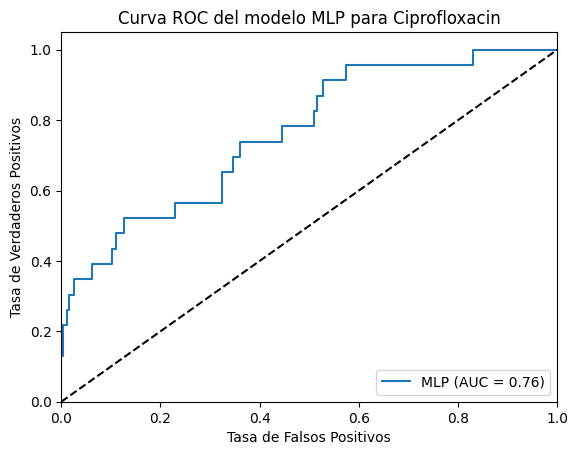

In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

def threshold_transform(X):
    X = np.array(X)
    X[X < 0.00005] = 0
    return X


def train_and_evaluate(x_train, y_train, x_test, y_test, iterations=10, threshold=0.1):
    accuracies = []
    recalls = []
    aucs = []

    for _ in range(iterations):
        x_train_threshold = threshold_transform(x_train)
        x_test_threshold = threshold_transform(x_test)

        x_train_mult = x_train_threshold * 100
        x_test_mult = x_test_threshold * 100

        scaler = StandardScaler()
        x_train_scaled = scaler.fit_transform(x_train_mult)
        x_test_scaled = scaler.transform(x_test_mult)

        selector = SelectKBest(f_classif, k=50)
        x_train_kbest = selector.fit_transform(x_train_scaled, y_train)
        x_test_kbest = selector.transform(x_test_scaled)

        # Entrenar el modelo MLP
        mlp = MLPClassifier(random_state=1234)
        mlp.fit(x_train_kbest, y_train)

        # Predecir las probabilidades en el conjunto de prueba
        y_pred_proba_mlp = mlp.predict_proba(x_test_kbest)[:, 1]

        # Calcular la curva ROC y el AUC
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba_mlp)
        roc_auc = roc_auc_score(y_test, y_pred_proba_mlp)
        aucs.append(roc_auc)

        # Aplicar un umbral para convertir las probabilidades en predicciones binarias
        y_pred_mlp = (y_pred_proba_mlp >= threshold).astype(int)
        report = classification_report(y_test, y_pred_mlp, output_dict=True)
        accuracies.append(report['accuracy'])
        recalls.append(report['macro avg']['recall'])

    mean_accuracy = np.mean(accuracies)
    mean_recall = np.mean(recalls)
    mean_auc = np.mean(aucs)

    print(f"Mean Accuracy: {mean_accuracy:.4f}")
    print(f"Mean Recall: {mean_recall:.4f}")
    print(f"Mean AUC: {mean_auc:.4f}")

    # Plotear la curva ROC de la última iteración
    plt.figure()
    plt.plot(fpr, tpr, label=f'MLP (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curva ROC del modelo MLP para Ciprofloxacin')
    plt.legend(loc='lower right')
    plt.show()

# Llamar a la función con los datos y el número de iteraciones deseado
train_and_evaluate(x_train, y_train['Ciprofloxacin'], x_test, y_test['Ciprofloxacin'], iterations=10, threshold=0.1)

C:\Users\danob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\danob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\danob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\danob\A

Mean Accuracy: 0.6888
Mean Recall: 0.6696
Mean AUC: 0.7227


C:\Users\danob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


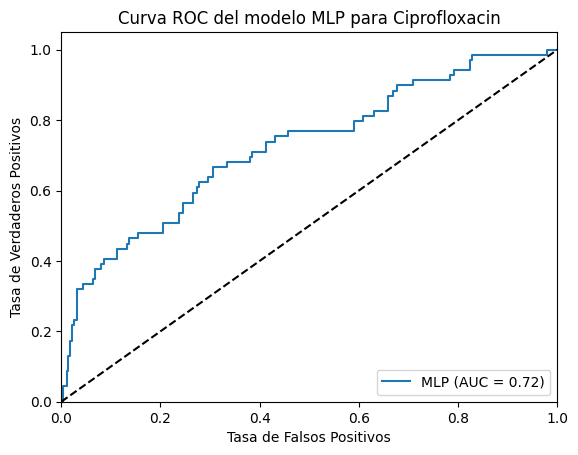

In [11]:
train_and_evaluate(x_train, y_train['Erythromycin'], x_test, y_test['Erythromycin'], iterations=10, threshold=0.1)

# Explicabilidad MLP

## SHAP

### Erythromycin

C:\Users\danob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\danob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
PermutationExplainer explainer: 348it [00:11,  5.80it/s]                         


['Proteina_11' 'Proteina_21' 'Proteina_34' 'Proteina_40' 'Proteina_130'
 'Proteina_150' 'Proteina_282' 'Proteina_283' 'Proteina_291'
 'Proteina_292' 'Proteina_293' 'Proteina_326' 'Proteina_339'
 'Proteina_340' 'Proteina_342' 'Proteina_343' 'Proteina_362'
 'Proteina_836' 'Proteina_837' 'Proteina_838' 'Proteina_849'
 'Proteina_1009' 'Proteina_1010' 'Proteina_1011' 'Proteina_1022'
 'Proteina_1023' 'Proteina_1024' 'Proteina_1025' 'Proteina_1035'
 'Proteina_1036' 'Proteina_1144' 'Proteina_1145' 'Proteina_1146'
 'Proteina_1147' 'Proteina_1148' 'Proteina_1177' 'Proteina_1182'
 'Proteina_1185' 'Proteina_1186' 'Proteina_1206' 'Proteina_1218'
 'Proteina_1395' 'Proteina_1410' 'Proteina_1411' 'Proteina_1672'
 'Proteina_1673' 'Proteina_1674' 'Proteina_1680' 'Proteina_4253'
 'Proteina_4431']


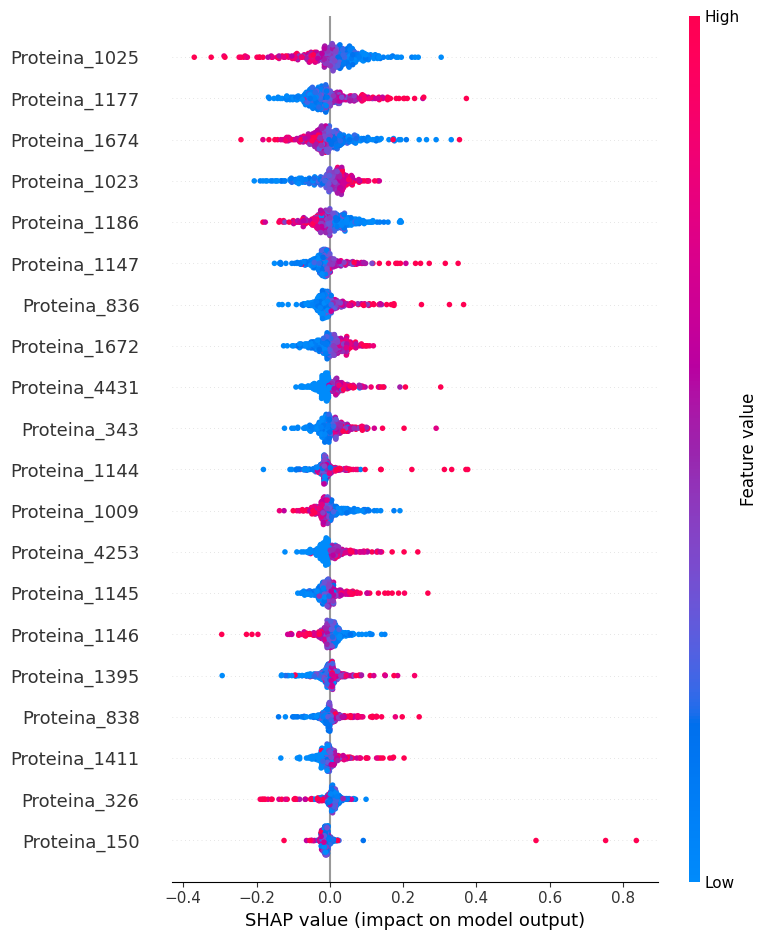

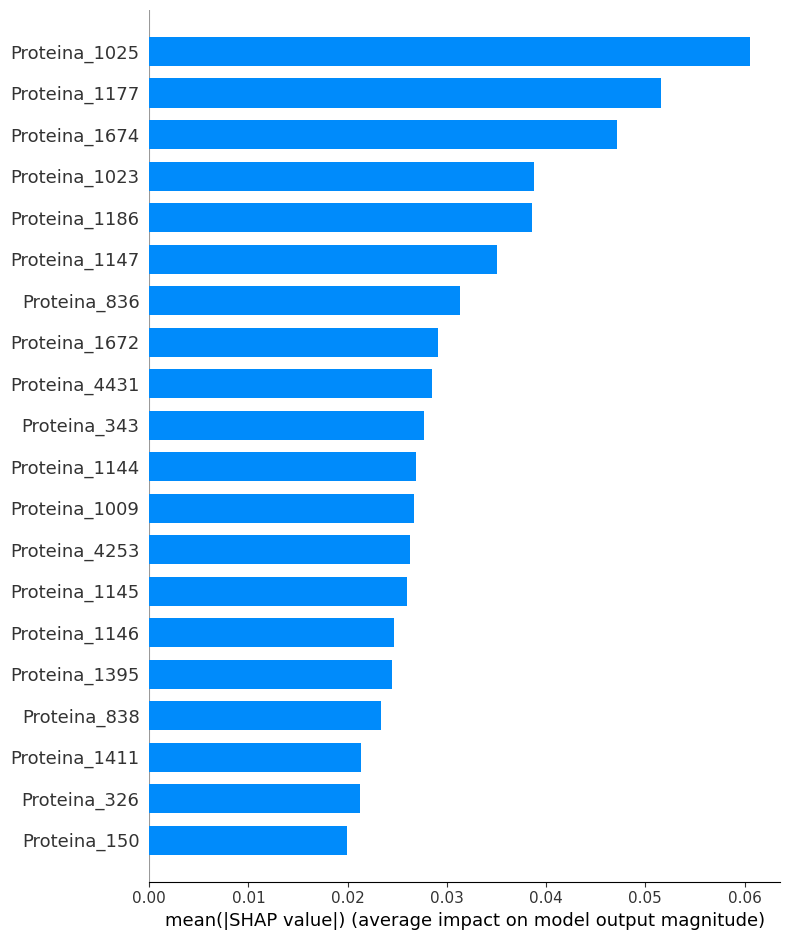

In [12]:
import shap
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

# Crear las funciones de transformación
def threshold_transform(X):
    X = np.array(X)
    X[X < 0.00005] = 0
    return X

def multiply_transform(X):
    return X * 100

# Aplicar las transformaciones
x_train_threshold = threshold_transform(x_train)
x_test_threshold = threshold_transform(x_test)

x_train_mult = multiply_transform(x_train_threshold)
x_test_mult = multiply_transform(x_test_threshold)

# Escalar los datos
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_mult)
x_test_scaled = scaler.transform(x_test_mult)

# Seleccionar las mejores características
selector = SelectKBest(f_classif, k=50)
x_train_selected = selector.fit_transform(x_train_scaled, y_train['Erythromycin'])
x_test_selected = selector.transform(x_test_scaled)

selected_indices = selector.get_support(indices=True)
feature_names = x_train.columns
selected_features = feature_names[selected_indices]

# Entrenar el modelo
mlp = MLPClassifier(random_state=1234)
mlp.fit(x_train_selected, y_train['Erythromycin'])

# Crear una función de predicción para el modelo
def model_predict(data):
    return mlp.predict(data)


# EXPLICABILIDAD 2
explainer = shap.Explainer(model_predict, x_test_selected)
shap_values = explainer(x_test_selected)

feature_names = np.array(selected_features)
print(feature_names)

# Plot SHAP values
shap.summary_plot(shap_values, x_test_selected, feature_names=feature_names)
shap.summary_plot(shap_values, x_test_selected, feature_names=feature_names, plot_type="bar")


### Ciprofloxacin

C:\Users\danob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


['Proteina_19' 'Proteina_52' 'Proteina_97' 'Proteina_111' 'Proteina_137'
 'Proteina_138' 'Proteina_144' 'Proteina_145' 'Proteina_149'
 'Proteina_150' 'Proteina_151' 'Proteina_163' 'Proteina_166'
 'Proteina_167' 'Proteina_449' 'Proteina_450' 'Proteina_530'
 'Proteina_531' 'Proteina_818' 'Proteina_819' 'Proteina_930'
 'Proteina_931' 'Proteina_994' 'Proteina_995' 'Proteina_996'
 'Proteina_998' 'Proteina_999' 'Proteina_1000' 'Proteina_1001'
 'Proteina_1002' 'Proteina_1003' 'Proteina_1011' 'Proteina_1014'
 'Proteina_1015' 'Proteina_1020' 'Proteina_1024' 'Proteina_1059'
 'Proteina_1518' 'Proteina_1675' 'Proteina_1727' 'Proteina_1728'
 'Proteina_2293' 'Proteina_2527' 'Proteina_2528' 'Proteina_2529'
 'Proteina_2530' 'Proteina_2531' 'Proteina_2532' 'Proteina_2539'
 'Proteina_3513']


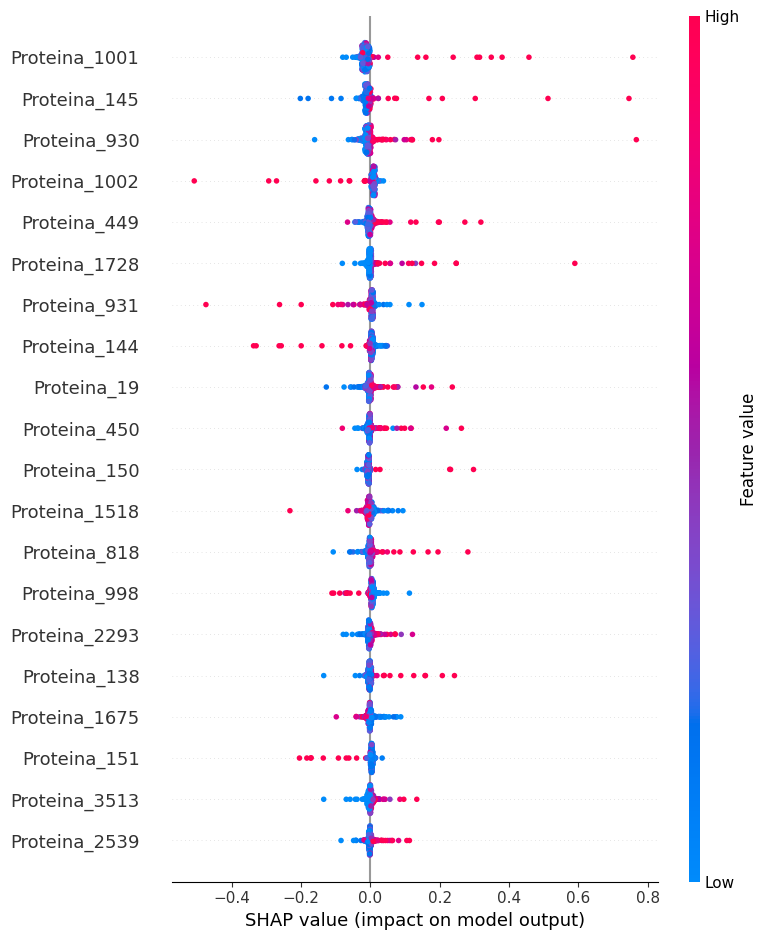

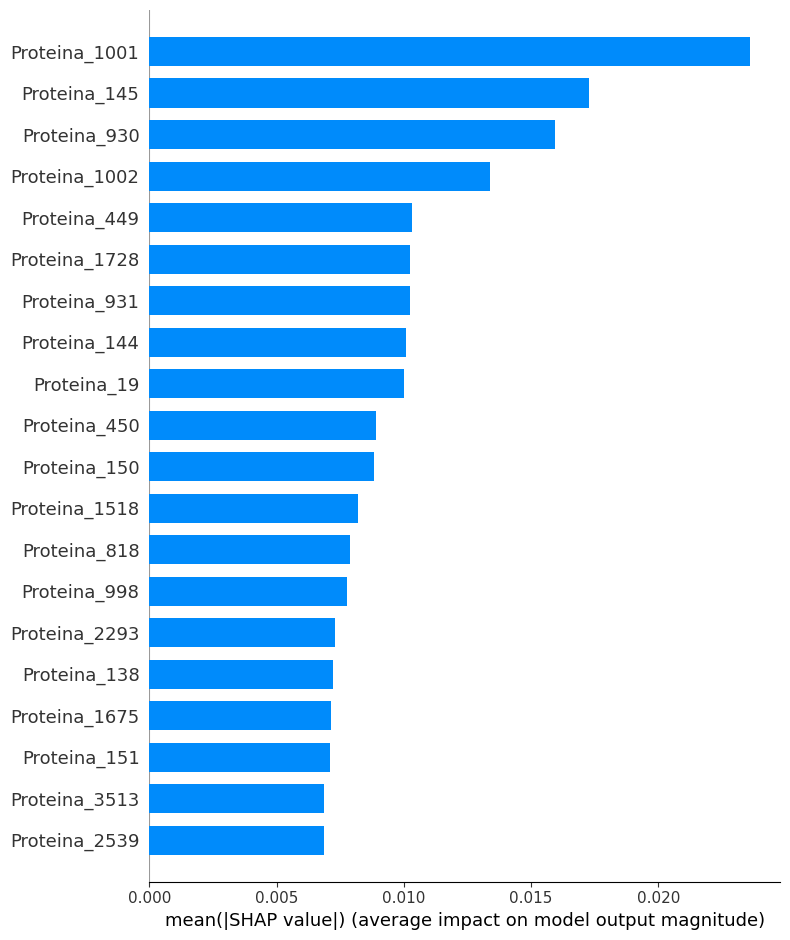

In [13]:
import shap
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

# Crear las funciones de transformación
def threshold_transform(X):
    X = np.array(X)
    X[X < 0.00005] = 0
    return X

def multiply_transform(X):
    return X * 100

# Aplicar las transformaciones
x_train_threshold = threshold_transform(x_train)
x_test_threshold = threshold_transform(x_test)

x_train_mult = multiply_transform(x_train_threshold)
x_test_mult = multiply_transform(x_test_threshold)

# Escalar los datos
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_mult)
x_test_scaled = scaler.transform(x_test_mult)

# Seleccionar las mejores características
selector = SelectKBest(f_classif, k=50)
x_train_selected = selector.fit_transform(x_train_scaled, y_train['Ciprofloxacin'])
x_test_selected = selector.transform(x_test_scaled)

selected_indices = selector.get_support(indices=True)
feature_names = x_train.columns
selected_features = feature_names[selected_indices]

# Entrenar el modelo
mlp = MLPClassifier(random_state=1234)
mlp.fit(x_train_selected, y_train['Ciprofloxacin'])

# Crear una función de predicción para el modelo
def model_predict(data):
    return mlp.predict(data)


# EXPLICABILIDAD 2
explainer = shap.Explainer(model_predict, x_test_selected)
shap_values = explainer(x_test_selected)

feature_names = np.array(selected_features)
print(feature_names)

# Plot SHAP values
shap.summary_plot(shap_values, x_test_selected, feature_names=feature_names)
shap.summary_plot(shap_values, x_test_selected, feature_names=feature_names, plot_type="bar")


## LIME
### Erythromycin

C:\Users\danob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\danob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88       278
         1.0       0.49      0.41      0.44        69

    accuracy                           0.80       347
   macro avg       0.67      0.65      0.66       347
weighted avg       0.79      0.80      0.79       347



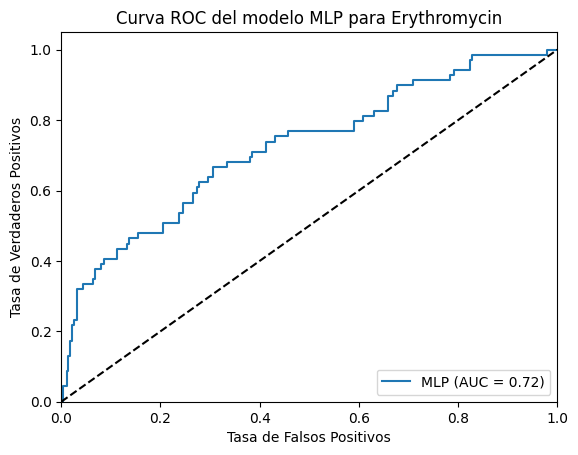

In [14]:
import lime
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import lime.lime_tabular

# Crear el pipeline con StandardScaler, SelectKBest y MLPClassifier
# Aplicar las transformaciones antes del escalado
x_train_threshold = threshold_transform(x_train)
x_test_threshold = threshold_transform(x_test)

x_train_mult = x_train_threshold * 100
x_test_mult = x_test_threshold * 100

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('selectkbest', SelectKBest(f_classif, k=50)),
    ('mlp', MLPClassifier(random_state=1234))
])

# Entrenar el modelo
pipeline.fit(x_train_mult, y_train['Erythromycin'])

# Crear un objeto LimeTabularExplainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=pipeline.named_steps['selectkbest'].transform(pipeline.named_steps['scaler'].transform(x_train)),
    feature_names=x_train.columns[pipeline.named_steps['selectkbest'].get_support()],
    class_names=['Clase 0', 'Clase 1'],
    mode='classification'
)

# Seleccionar una muestra del conjunto de prueba para explicar
sample_index = 0
sample = pipeline.named_steps['selectkbest'].transform(pipeline.named_steps['scaler'].transform(x_test_mult[sample_index:sample_index+1]))

# Generar la explicación para la muestra seleccionada
exp = explainer.explain_instance(
    data_row=sample[0],
    predict_fn=pipeline.named_steps['mlp'].predict_proba
)

# Mostrar la explicación
exp.show_in_notebook(show_table=True)

# Predecir en el conjunto de prueba
y_pred = pipeline.predict(x_test_mult)
y_pred_proba = pipeline.predict_proba(x_test_mult)[:, 1]

# Generar el reporte de clasificación
print(classification_report(y_test['Erythromycin'], y_pred))

# Calcular la curva ROC y el AUC
fpr, tpr, _ = roc_curve(y_test['Erythromycin'], y_pred_proba)
roc_auc = roc_auc_score(y_test['Erythromycin'], y_pred_proba)

# Plotear la curva ROC
plt.figure()
plt.plot(fpr, tpr, label=f'MLP (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC del modelo MLP para Erythromycin')
plt.legend(loc='lower right')
plt.show()


### Ciprofloxacin

C:\Users\danob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\danob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96       324
         1.0       0.47      0.30      0.37        23

    accuracy                           0.93       347
   macro avg       0.71      0.64      0.67       347
weighted avg       0.92      0.93      0.92       347



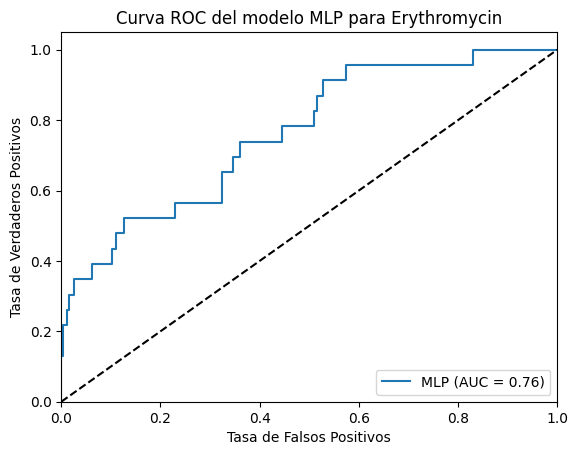

In [19]:
import lime
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import lime.lime_tabular

# Crear el pipeline con StandardScaler, SelectKBest y MLPClassifier
# Aplicar las transformaciones antes del escalado
x_train_threshold = threshold_transform(x_train)
x_test_threshold = threshold_transform(x_test)

x_train_mult = x_train_threshold * 100
x_test_mult = x_test_threshold * 100

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('selectkbest', SelectKBest(f_classif, k=50)),
    ('mlp', MLPClassifier(random_state=1234))
])

# Entrenar el modelo
pipeline.fit(x_train_mult, y_train['Ciprofloxacin'])

# Crear un objeto LimeTabularExplainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=pipeline.named_steps['selectkbest'].transform(pipeline.named_steps['scaler'].transform(x_train)),
    feature_names=x_train.columns[pipeline.named_steps['selectkbest'].get_support()],
    class_names=['Clase 0', 'Clase 1'],
    mode='classification'
)

# Seleccionar una muestra del conjunto de prueba para explicar
sample_index = 4
sample = pipeline.named_steps['selectkbest'].transform(pipeline.named_steps['scaler'].transform(x_test_mult[sample_index:sample_index+1]))

# Generar la explicación para la muestra seleccionada
exp = explainer.explain_instance(
    data_row=sample[0],
    predict_fn=pipeline.named_steps['mlp'].predict_proba
)

# Mostrar la explicación
exp.show_in_notebook(show_table=True)

# Predecir en el conjunto de prueba
y_pred = pipeline.predict(x_test_mult)
y_pred_proba = pipeline.predict_proba(x_test_mult)[:, 1]

# Generar el reporte de clasificación
print(classification_report(y_test['Ciprofloxacin'], y_pred))

# Calcular la curva ROC y el AUC
fpr, tpr, _ = roc_curve(y_test['Ciprofloxacin'], y_pred_proba)
roc_auc = roc_auc_score(y_test['Ciprofloxacin'], y_pred_proba)

# Plotear la curva ROC
plt.figure()
plt.plot(fpr, tpr, label=f'MLP (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC del modelo MLP para Erythromycin')
plt.legend(loc='lower right')
plt.show()
